# Decision Tree in Machine Learning

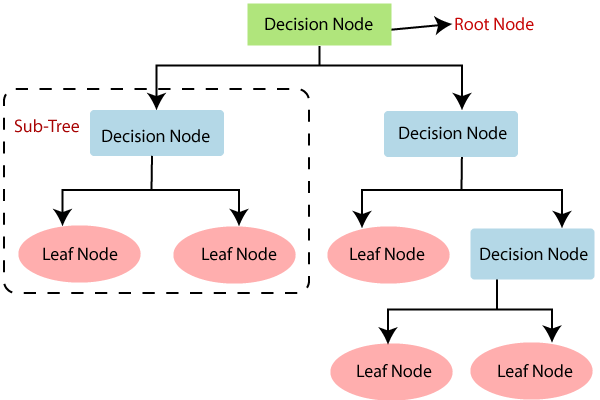

## Load the Data

In [ ]:
#Rank, Rating - 1 Very Bad & 5 Very Good

In [ ]:
onehotencoding & labelencoding

- ordinal encoding
- target mean encoding

In [ ]:
"Date" - Day, Month & Year

In [ ]:
"5-10"

"10-20"

"20-25"

In [314]:
import opendatasets as od
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
od.download('https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing')

100%|███████████████████████████████████████████| 393k/393k [00:00<00:00, 425kB/s]

In [320]:
df = pd.read_csv('bank-marketing/bank-additional-full.csv',sep=';')

In [321]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Clean the Data

In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
#no missing data!

## Analyze & Visualize the Data

In [9]:
#Do it yourself

## Split the Data

In [10]:
from sklearn.model_selection import train_test_split

In [ ]:
#train, validation & test sets

In [323]:
train_val_df, test_df = train_test_split(df,test_size=0.2,random_state=42)

In [324]:
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [325]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
list[0:-1]

In [16]:
inputs = list(df.columns[0:-1])

In [17]:
inputs

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [18]:
output = 'y'

In [19]:
train_inputs = train_df[inputs]
train_target = train_df[output]

In [20]:
val_inputs = val_df[inputs]
val_target = val_df[output]

In [21]:
test_inputs = test_df[inputs]
test_target = test_df[output]

## Preprocess the Data

### Scaling the Data

In [331]:
list(df.select_dtypes(np.number).columns)

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [333]:
#df[list(df.select_dtypes(np.number).columns)]

In [326]:
numerics = list(df.select_dtypes(np.number).columns)

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()

In [34]:
scaler.fit(df[numerics])

MinMaxScaler()

In [35]:
train_inputs[numerics] = scaler.transform(train_inputs[numerics])
val_inputs[numerics] = scaler.transform(val_inputs[numerics])
test_inputs[numerics] = scaler.transform(test_inputs[numerics])

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_16257/4072025852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs[numerics] = scaler.transform(train_inputs[numerics])
/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_16257/4072025852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_inputs[numerics] = scaler.transform(val_inputs[numerics])
/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_16257/4072025852.py:3: SettingWithCopyWarning: 
A value is trying to 

In [36]:
train_inputs[numerics].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,24712.000000,24712.000000,24712.000000,24712.000000,24712.000000,24712.000000,24712.000000,24712.000000,24712.000000,24712.000000
mean,0.284824,0.052555,0.028716,0.964119,0.024511,0.725507,0.536221,0.429898,0.677644,0.769515
std,0.128307,0.052816,0.050701,0.185426,0.069937,0.326761,0.225719,0.193164,0.392789,0.273080
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.185185,0.020943,0.000000,1.000000,0.000000,0.333333,0.340608,0.338912,0.160961,0.512287
50%,0.259259,0.036397,0.018182,1.000000,0.000000,0.937500,0.603274,0.376569,0.957379,0.859735
75%,0.370370,0.065067,0.036364,1.000000,0.000000,1.000000,0.698753,0.602510,0.980957,1.000000
max,1.000000,1.000000,0.763636,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Encoding the Data

In [336]:
df.select_dtypes('object').columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [37]:
categoricals = list(df.select_dtypes('object').columns)

In [44]:
categoricals.remove('y')

In [45]:
categoricals

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [337]:
df[categoricals]

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent


In [38]:
from sklearn.preprocessing import OneHotEncoder

In [51]:
encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')

In [ ]:
Gender - M & F

Gender_M - 1 0

Gender_F - 0 1




In [338]:
encoder.fit(df[categoricals])

/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [339]:
encoded_cols = list(encoder.get_feature_names_out(categoricals))

encoded_cols

['job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_failure',
 'poutcome_nonexistent',
 'poutcome_success']

In [54]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categoricals])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categoricals])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categoricals])

In [55]:
train_inputs[encoded_cols]

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
18354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3152,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
32222,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
38536,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5518,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
20570,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
33294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
35399,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Fit the Data

### Logistic Regression

In [377]:
from sklearn.linear_model import LogisticRegression

In [378]:
log_model = LogisticRegression()

In [379]:
train_inputs[encoded_cols + numerics]

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
18354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.209877,0.031110,0.036364,1.0,0.000000,1.000000,0.669135,0.338912,0.982544,1.000000
3152,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.185185,0.040667,0.000000,1.0,0.000000,0.937500,0.698753,0.602510,0.958059,0.859735
32222,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.271605,0.008947,0.000000,1.0,0.000000,0.333333,0.269680,0.192469,0.153933,0.512287
22456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.358025,0.046564,0.000000,1.0,0.000000,1.000000,0.484412,0.615063,0.981637,1.000000
38536,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.691358,0.037617,0.000000,1.0,0.000000,0.000000,0.089634,1.000000,0.020404,0.203781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5518,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.370370,0.023993,0.000000,1.0,0.000000,0.937500,0.698753,0.602510,0.957379,0.859735
20570,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.493827,0.124441,0.036364,1.0,0.000000,1.000000,0.484412,0.615063,0.982090,1.000000
33294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.320988,0.086621,0.000000,1.0,0.142857,0.333333,0.269680,0.192469,0.148946,0.512287
35399,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.098765,0.024603,0.036364,1.0,0.000000,0.333333,0.269680,0.192469,0.139651,0.512287


In [380]:
log_model.fit(train_inputs[numerics + encoded_cols], train_target)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [381]:
train_preds = log_model.predict(train_inputs[numerics + encoded_cols])

In [382]:
val_preds = log_model.predict(val_inputs[numerics + encoded_cols])

In [383]:
from sklearn.metrics import accuracy_score

In [384]:
accuracy_score(train_target, train_preds)

0.9098009064422143

In [385]:
accuracy_score(val_target, val_preds)

0.9145423646516144

In [386]:
train_target.value_counts()

no     21923
yes     2789
Name: y, dtype: int64

In [387]:
from sklearn.metrics import f1_score

In [388]:
pos_label = 'yes'

In [389]:
f1_score(train_target, train_preds,pos_label=pos_label)

0.4884094560477393

In [390]:
f1_score(val_target, val_preds,pos_label=pos_label)

0.5138121546961326

In [ ]:
Decision Tree - Regression & Classification

DecissionTreeRegressor

DecisionTreeClassifier

### Decision Tree

A decision tree is a popular supervised machine learning algorithm `used for both` `classification` and `regression` tasks. It works by recursively splitting the dataset into subsets based on the most significant attribute at each node. Each internal node of the tree represents a decision based on a feature, each branch represents the outcome of the decision, and each leaf node represents the final predicted class or value.

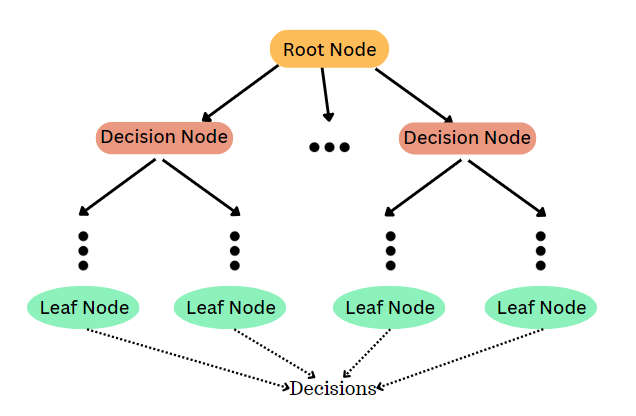

Here's a basic overview of how a decision tree works:

1. **Root Node:** The topmost node in the tree is called the root node. It represents the entire dataset and is split into subsets based on a chosen feature.

2. **Decision Nodes (Internal Nodes):** These nodes represent decisions based on a specific feature. Each decision node is associated with a particular feature, and the dataset is divided into subsets based on the values of that feature.

3. **Leaf Nodes:** The terminal nodes of the tree are called leaf nodes. They represent the final predicted class or value for the input data.


Advantages of decision trees include their interpretability, ease of visualization, and ability to handle both numerical and categorical data. However, they are prone to overfitting, especially if the tree is too deep.

#### Manual Decision Tree

<img src="https://qph.cf2.quoracdn.net/main-qimg-35d9cf8c3db8315cd801ed1f463f8690-pjlq" height=500 width=500>

#### Machine Learning Decision Tree

In [ ]:
Decision Tree

train_score = 0.76

val_score = 0.71

In [ ]:
Random Forest



In [ ]:
Logistic Regression

train_score = 0.48

val_score = 0.36

In [ ]:
1 - sum(prb)^22

instance of the set

column

n number of categories - 1 0



<img src="https://images.datacamp.com/image/upload/f_auto,q_auto:best/v1545933328/output_65_0_jteora.png" height=1000 width=800>

Attribute selection measures (ASMs) are crucial for decision tree algorithms to determine the best attributes for splitting the data at each node. Two popular techniques for ASM are:

1. **Gini Index:** The Gini Index is a popular measure for attribute selection, often used in the context of the CART (Classification and Regression Trees) algorithm. It measures the impurity of a set of data, with a lower Gini Index indicating a more homogeneous set. The goal is to choose the attribute that minimizes the Gini Index.

   The formula for Gini Index is as follows:

![](https://i.imgur.com/ZXlG3JF.png)


The probability of choosing a random instance of a class in the context of the Gini Index is calculated based on the relative frequency of that class in the dataset.

In [ ]:
1 - (p1^2 + p2^2 + p3^2 +...pk^2)

In [360]:
1 - (1/4)**2 - (3/4)**2

0.375

In [359]:
1 - (((3/6)**2) + ((3/6)**2))

0.5

In [362]:
((6*0.5) + (4*0.375))/(6+4) 

0.45

In [363]:
1 - (3/8)**2 - (5/8)**2

0.46875

2. **Information Gain (IG):** Information Gain is a widely used measure for decision tree algorithms. It quantifies the effectiveness of an attribute in classifying the data. The idea is to select the attribute that provides the most information about the target variable. 

   The formula for Information Gain is as follows:

![](https://i.imgur.com/SMxiSTs.png)

> Information Gain is based on the concept of entropy, which measures the impurity or disorder in a set of data.

Entropy is a measure of impurity or disorder in a set of data. In the context of decision trees, entropy is often used to quantify the impurity of a node in terms of the distribution of class labels. The formula for calculating entropy is as follows:

![](https://i.imgur.com/yX1mMZv.png)

In the context of decision tree algorithms, the goal is to minimize entropy, either by selecting attributes that lead to more homogeneous child nodes (in the case of Information Gain) or by minimizing the Gini Index (a related measure of impurity) in the case of the Gini Index criterion.

The process of selecting the threshold for a continuous attribute, such as BMI or Glucose, involves evaluating various potential threshold values and choosing the one that results in the best split according to a specific criterion, like the Gini Index or Information Gain. Here's a more detailed explanation of how the threshold is typically picked:

1. **Evaluate Potential Thresholds:**
   - The decision tree algorithm considers different potential threshold values for the continuous attribute (e.g., BMI).
   - These thresholds are chosen based on the unique values present in the dataset for that attribute or through some systematic search process.

2. **Calculate Impurity Measure:**
   - For each potential threshold, the algorithm calculates the impurity measure (e.g., Gini Index) for the resulting child nodes after the split.
   - The impurity measure gives an indication of how well the data is classified based on the chosen threshold.

3. **Select Optimal Threshold:**
   - The algorithm compares the impurity measures for all potential thresholds and selects the one that minimizes the impurity or maximizes the information gain.
   - For example, if using the Gini Index, the algorithm chooses the threshold that leads to the lowest overall Gini Index for the resulting child nodes.

4. **Recursive Process:**
   - The selection of the threshold is performed recursively for each attribute considered during the construction of the decision tree.
   - The entire process is repeated for subsequent nodes in the tree until a stopping criterion is met (e.g., a maximum depth is reached, a minimum number of instances in a node).

5. **Final Decision Tree:**
   - The result is a decision tree with nodes split at the selected thresholds for various attributes, leading to a structure that effectively classifies the data.

It's important to note that the exact method for selecting thresholds can vary between decision tree algorithms (e.g., CART, ID3, C4.5), and different algorithms may use different criteria to evaluate the effectiveness of a split. Commonly used criteria include the Gini Index and Information Gain. The goal is to find the threshold that maximizes the separation of classes in the resulting child nodes.

In [391]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
yes - 80 * 0.2

no - 20 * 3.5

In [ ]:
- dummy_weights to your target classes to balance the data
- dummy_rows with target as no

age salary credit. 0

20 - 60 more dummy rows which are randomly repeated using 20 existing rows

In [392]:
model = DecisionTreeClassifier(class_weight='balanced')

In [393]:
model.fit(train_inputs[numerics + encoded_cols],train_target)

DecisionTreeClassifier(class_weight='balanced')

In [369]:
from sklearn.tree import plot_tree, export_text

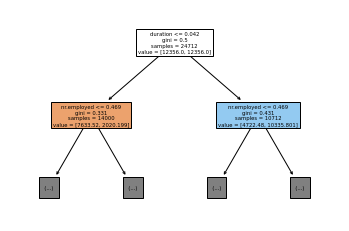

In [400]:
plot_tree(model, feature_names=train_inputs[numerics + encoded_cols].columns, max_depth=1, filled=True);

In [373]:
tree = export_text(model, feature_names=list(train_inputs[encoded_cols + numerics].columns))
print(tree)

|--- job_blue-collar <= 0.04
|   |--- job_technician <= 0.47
|   |   |--- job_blue-collar <= 0.03
|   |   |   |--- job_blue-collar <= 0.01
|   |   |   |   |--- class: no
|   |   |   |--- job_blue-collar >  0.01
|   |   |   |   |--- job_housemaid <= 0.00
|   |   |   |   |   |--- job_technician <= 0.14
|   |   |   |   |   |   |--- class: no
|   |   |   |   |   |--- job_technician >  0.14
|   |   |   |   |   |   |--- job_admin. <= 0.07
|   |   |   |   |   |   |   |--- class: no
|   |   |   |   |   |   |--- job_admin. >  0.07
|   |   |   |   |   |   |   |--- marital_single <= 0.50
|   |   |   |   |   |   |   |   |--- month_nov <= 0.50
|   |   |   |   |   |   |   |   |   |--- job_admin. <= 0.56
|   |   |   |   |   |   |   |   |   |   |--- month_jun <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: yes
|   |   |   |   |   |   |   |   |   |   |--- month_jun >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |-

In [394]:
train_preds = model.predict(train_inputs[numerics + encoded_cols])
val_preds = model.predict(val_inputs[numerics + encoded_cols])

In [ ]:
logistic regression - train - 0.48, val - 0.51 

decision tree - train - 1.0, val - 0.51

In [ ]:
#train, val & test

In [395]:
f1_score(train_target, train_preds,pos_label=pos_label)

1.0

In [396]:
f1_score(val_target, val_preds,pos_label=pos_label)

0.5102153506350082

In [414]:
pd.DataFrame(log_model.coef_).T.sort_values(by=0,ascending=False).head(10)

,0
1,18.956543
6,2.465870
50,1.357455
8,0.846996
62,0.490240
7,0.461143
30,0.384407
15,0.317430
46,0.222200
43,0.180851


In [415]:
#model.coef_

In [416]:
model.feature_importances_

array([5.49413030e-02, 4.44269379e-01, 2.36226330e-02, 9.67852309e-03,
       3.15886426e-03, 1.29530994e-03, 1.24432676e-02, 6.64585819e-02,
       5.84083390e-02, 1.71953616e-01, 4.25401606e-03, 5.80933990e-03,
       9.66028886e-04, 1.85404260e-03, 3.91855886e-03, 1.61443970e-03,
       4.16228827e-03, 4.37722781e-03, 2.97807333e-03, 4.93450095e-03,
       3.63567579e-03, 5.62180018e-04, 2.79846334e-03, 4.54037135e-03,
       3.73752902e-03, 7.84062003e-05, 2.17213878e-03, 2.57020101e-03,
       4.67887667e-03, 4.74921294e-03, 7.28720041e-05, 5.23622825e-03,
       5.44785014e-03, 1.43391579e-03, 6.36869103e-03, 9.30359048e-04,
       0.00000000e+00, 3.86338666e-03, 2.33902147e-04, 3.64073252e-03,
       5.11076882e-03, 1.05336705e-03, 1.82845682e-03, 2.30017532e-03,
       9.09897655e-04, 3.68785624e-04, 1.75629617e-03, 6.74245697e-04,
       1.14420400e-03, 4.91356012e-04, 3.96209885e-04, 4.86403271e-04,
       8.24537677e-04, 1.53027440e-02, 6.10000884e-04, 4.39248086e-03,
      

In [417]:
importance_df = pd.DataFrame({
    'feature': train_inputs[numerics + encoded_cols].columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [310]:
importance_df.head(10)

,feature,importance
1,duration,0.329598
9,nr.employed,0.155097
0,age,0.088036
8,euribor3m,0.071698
2,campaign,0.027640
7,cons.conf.idx,0.024113
62,poutcome_success,0.014725
56,day_of_week_mon,0.013085
29,education_high.school,0.011742
39,housing_yes,0.011272


In [418]:
import seaborn as sns

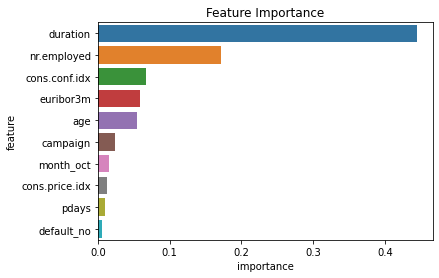

In [419]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

### Hyperparameter Tuning

In [ ]:
features - independent columns

max_features = 5

10


age


salary

age


gender

health_cond

In [421]:
?DecisionTreeClassifier

Let's delve into the hyperparameters `max_depth` and `max_leaf_nodes` commonly associated with decision trees. These hyperparameters are specific to tree-based models, such as Decision Trees and Random Forests.

1. **max_depth:**

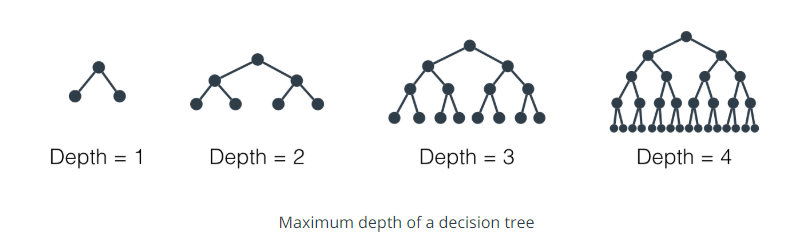

   - **Definition:** `max_depth` represents the maximum depth of the decision tree.
   - **Purpose:** It controls the maximum depth of each tree in the ensemble. A deeper tree can capture more complex relationships in the training data, but it may also lead to overfitting.
   - **Adjustment:** You can set `max_depth` to a specific integer value to limit the depth of the tree. If set to `None` (the default), the tree will expand until all leaves are pure or contain fewer samples than `min_samples_split`.
   - **Example:**
     ```python
     # Setting max_depth to 5
     model = DecisionTreeClassifier(max_depth=5)
     ```

2. **max_leaf_nodes:**

<img src="https://dz2cdn1.dzone.com/storage/temp/13820661-1596719409020.png" height=500 width=500>

   - **Definition:** `max_leaf_nodes` specifies the maximum number of leaf nodes in the decision tree.
   - **Purpose:** It provides an alternative way to control the size of the tree. Instead of specifying the depth directly, you can set the maximum number of leaf nodes. This can help prevent overfitting and simplify the tree.
   - **Adjustment:** If `max_leaf_nodes` is not `None`, the tree will be grown until it contains this number of leaves. The tree may be pruned after growing to this size.
   - **Example:**
     ```python
     # Setting max_leaf_nodes to 10
     model = DecisionTreeClassifier(max_leaf_nodes=10)
     ```

Choosing appropriate values for these hyperparameters is essential for achieving a balance between model complexity and generalization to unseen data. Hyperparameter tuning techniques, such as grid search or randomized search, can be used to find the optimal values based on cross-validated performance. For example:


**Max Depth**

In [ ]:
#

In [462]:
model = DecisionTreeClassifier(max_depth=6, random_state=42)

In [463]:
model.fit(train_inputs[numerics + encoded_cols],train_target)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [464]:
train_preds = model.predict(train_inputs[numerics + encoded_cols])
val_preds = model.predict(val_inputs[numerics + encoded_cols])

In [ ]:
10-100 with 10 difference - 10 iterations - not much score improvement

<10 

>100


100-500

In [ ]:
#train - 48, val - 51 - log

#train - 1, val - 52 - dect

train - 62, val - 60 - dect + max_depth

In [465]:
f1_score(train_target, train_preds,pos_label=pos_label)

0.636245110821382

In [466]:
f1_score(val_target, val_preds,pos_label=pos_label)

0.6057855927396483

**Max Leaf Nodes**

In [557]:
model = DecisionTreeClassifier(max_depth=6, max_leaf_nodes=None,random_state=42)

In [558]:
model.fit(train_inputs[numerics + encoded_cols],train_target)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [559]:
train_preds = model.predict(train_inputs[numerics + encoded_cols])
val_preds = model.predict(val_inputs[numerics + encoded_cols])

In [560]:
f1_score(train_target, train_preds,pos_label=pos_label)

0.636245110821382

In [561]:
f1_score(val_target, val_preds,pos_label=pos_label)

0.6057855927396483

#### Max Features

In [562]:
df.shape

(41188, 21)

In [608]:
model = DecisionTreeClassifier(max_depth=6,random_state=42)

In [628]:
model = DecisionTreeClassifier(max_features=3,random_state=42)

In [629]:
model.fit(train_inputs[numerics + encoded_cols],train_target)

DecisionTreeClassifier(max_features=3, random_state=42)

In [630]:
train_preds = model.predict(train_inputs[numerics + encoded_cols])
val_preds = model.predict(val_inputs[numerics + encoded_cols])

In [631]:
f1_score(train_target, train_preds,pos_label=pos_label)

1.0

In [ ]:
val - 0.48

val - 0.52

val tuned - 0.60

In [ ]:
val of log < val of dect base < val of dect tuned

In [ ]:
train > val - most number of times

val > train - rarely

train ~ val - ideal

In [ ]:
train ~ val

In [632]:
f1_score(val_target, val_preds,pos_label=pos_label)

0.43948689347462355

**Min Samples Split**

In [633]:
model = DecisionTreeClassifier(max_depth=80, max_leaf_nodes=400,min_samples_split=8,random_state=42)

In [634]:
model.fit(train_inputs[numerics + encoded_cols],train_target)

DecisionTreeClassifier(max_depth=80, max_leaf_nodes=400, min_samples_split=8,
                       random_state=42)

In [635]:
train_preds = model.predict(train_inputs[numerics + encoded_cols])
val_preds = model.predict(val_inputs[numerics + encoded_cols])

In [636]:
f1_score(train_target, train_preds,pos_label=pos_label)

0.7647172360548157

In [637]:
f1_score(val_target, val_preds,pos_label=pos_label)

0.5765453495089544

In [638]:
#Write a function that takes parameter values and loops over different values of the parameters to get the best score.

### GridSearchCV

Grid search is a hyperparameter tuning technique that involves systematically searching through a predefined set of hyperparameter values for a machine learning model. The goal is to find the combination of hyperparameters that yields the best performance on a given performance metric. This technique is especially useful when you have a limited understanding of the optimal hyperparameter values for your model.

In [ ]:
matplotlib

In [642]:
df.sample(1000)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
33665,31,blue-collar,married,basic.9y,unknown,yes,yes,cellular,may,wed,...,3,999,1,failure,-1.8,92.893,-46.2,1.281,5099.1,no
28042,32,technician,single,university.degree,no,yes,no,cellular,apr,thu,...,2,999,1,failure,-1.8,93.075,-47.1,1.483,5099.1,no
33415,35,blue-collar,married,basic.9y,no,yes,yes,cellular,may,tue,...,1,999,1,failure,-1.8,92.893,-46.2,1.291,5099.1,no
30205,30,student,single,university.degree,no,no,no,cellular,apr,thu,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,no
40503,39,blue-collar,single,basic.4y,no,yes,yes,telephone,aug,fri,...,1,999,0,nonexistent,-1.7,94.027,-38.3,0.898,4991.6,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32109,28,student,single,university.degree,no,no,no,cellular,may,fri,...,1,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1,no
28941,35,blue-collar,married,basic.4y,no,yes,no,cellular,apr,fri,...,2,999,1,failure,-1.8,93.075,-47.1,1.405,5099.1,no
38313,28,student,single,unknown,no,yes,no,cellular,oct,thu,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.740,5017.5,no
10973,52,services,single,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no


In [639]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Define the hyperparameter grid
param_grid = {
    'max_leaf_nodes': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# Create the RandomForestClassifier
model = DecisionTreeClassifier(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring=make_scorer(f1_score, pos_label=pos_label))

grid_search.fit(train_inputs[numerics + encoded_cols], train_target)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model on the validation set
val_accuracy = grid_search.score(val_inputs[numerics + encoded_cols], val_target)
print("Validation Accuracy:", val_accuracy)

Best Hyperparameters: {'max_depth': None, 'max_leaf_nodes': 50, 'min_samples_split': 2}
Validation Accuracy: 0.5606900800985829


### Exercise

**Dataset:**
- The dataset is available here: https://www.kaggle.com/datasets/saurabhbagchi/dish-network-hackathon?select=Train_Dataset.csv

**Tasks:**
1. Load the dataset and explore its structure.
2. Preprocess the data: 
    - Handle missing values
    - Scale numerical variables
    - Encode categorical variables
    - Split the data into training, validation and testing sets.
3. Fit Logistic Regression & Decision Tree models.
4. Compare the train & validations scores.
5. Improve scores using Hyperparameter Tuning.